# **Project Name**    - Yes Bank Stock Price Prediction


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Vaishnavi Ramakant Patil

# **Project Summary -**

* The Yes Bank Stock Price Prediction project is an endeavor to develop an accurate machine learning model capable of forecasting future stock prices for Yes Bank. The project revolves around analyzing historical data to derive meaningful insights and patterns that can aid in predicting the stock prices. The dataset utilized for this project comprises 185 rows and 4 columns, including the Date, Open, High, Low, and Close prices.

* The primary objective of this project is to construct a regression model where the Close price serves as the dependent variable, while the Open, High, and Low prices function as independent variables. By leveraging the relationship between these variables, the model aims to accurately predict the future Close prices of Yes Bank stocks.

* The project is divided into several key steps, each playing a crucial role in achieving the ultimate goal of developing an effective stock price prediction model.

* The initial step involves gathering the dataset, ensuring the absence of missing values, and organizing the columns. The Date column is set as the index, while the Open, High, Low, and Close prices are allocated as separate columns for analysis.

* In some cases, additional features can be derived from existing data to enhance the model's predictive capabilities. For instance, lag features or technical indicators might be constructed from the price data to capture pertinent information. This step aims to enrich the dataset and improve the model's ability to capture complex

# **GitHub Link -**

https://github.com/vaishnavitechcoder/Yes_Bank_Stock_Price_Prediction

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import missingno as mnso

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/MyDrive/data_YesBank_StockPrices.csv'
df = pd.read_csv(file)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sum()

0

<Axes: >

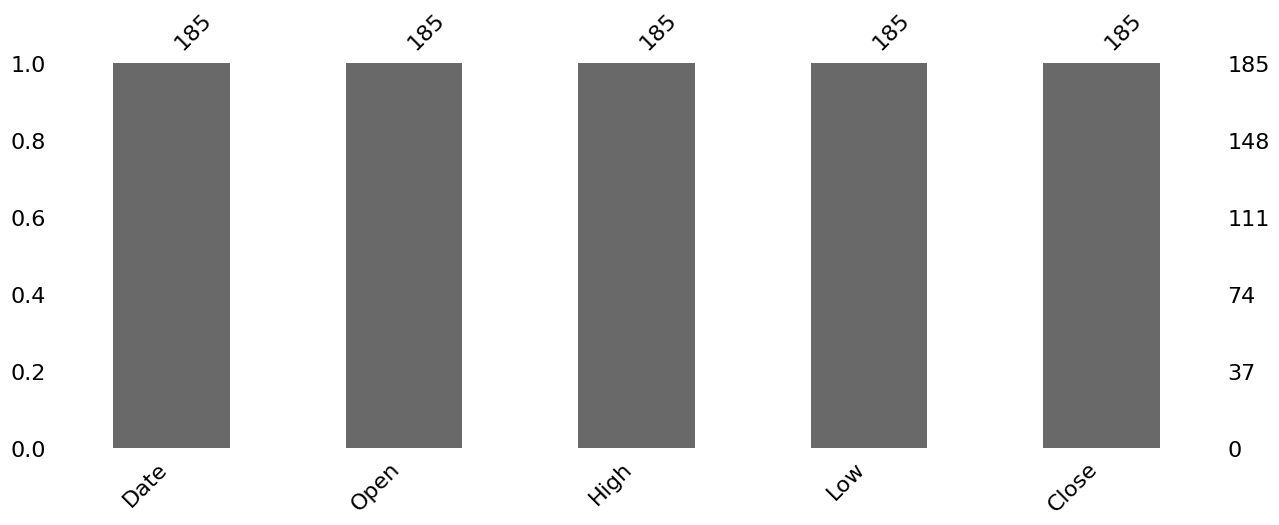

In [ ]:
# Visualizing the missing values
fig, ax = plt.subplots(figsize=(15,5))
# create the missingno bar plot
mnso.bar(df, ax=ax)

### What did you know about your dataset?

We have 185 rows and 5 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* **Date:**  It denotes the month and year of the for a particular price.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#copying data to preserve orignal file
df1= df.copy()

In [ ]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

In [ ]:
# Write your code to make your dataset analysis ready.
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

### What all manipulations have you done and insights you found?

Instead of dropping the date, we will convert it into the proper format and use it as an index.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-18-22d67fc4ad4a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Close'])


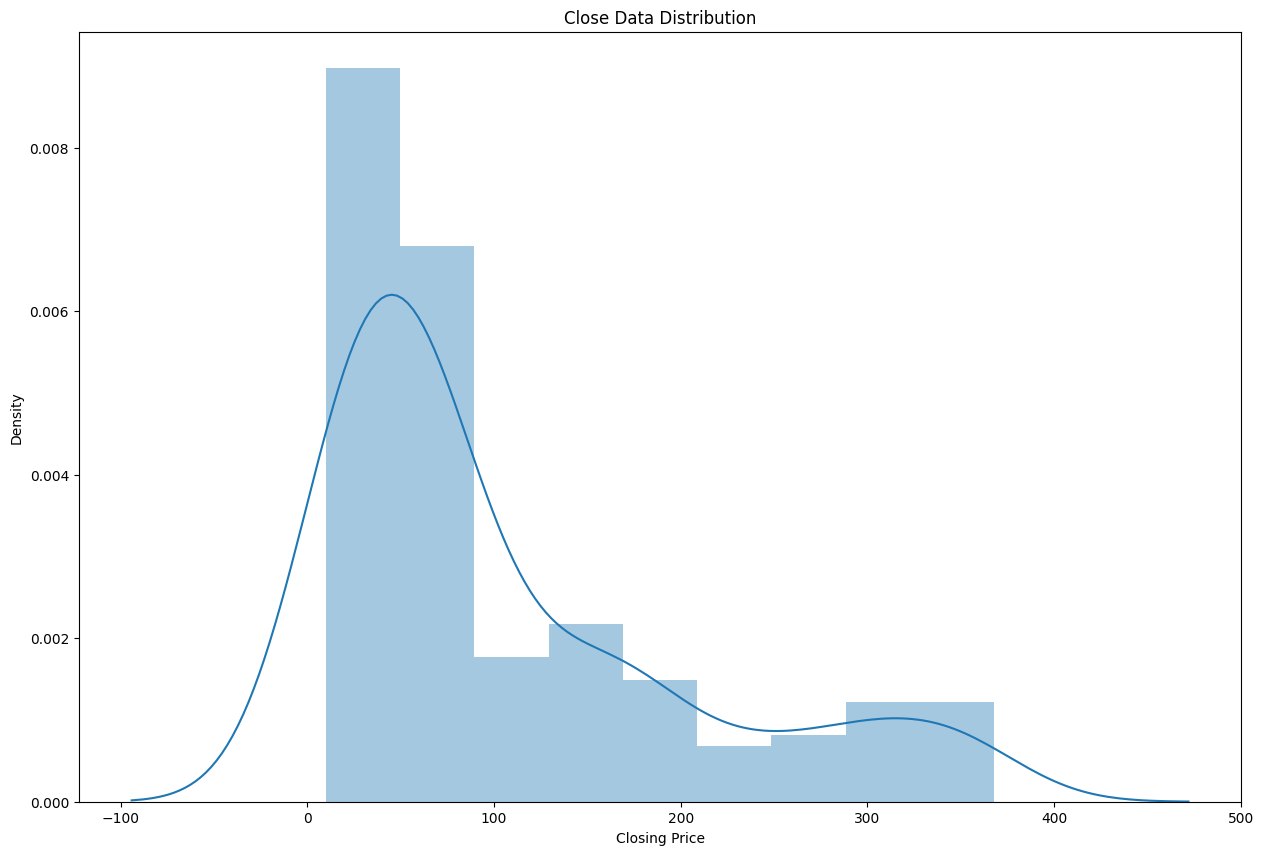

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,10))
sns.distplot(df1['Close'])
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

I choose histogram because helps us to identify distribution of our data clearly.

##### 2. What is/are the insight(s) found from the chart?

From the chart depicting the distribution of 'Close' prices, the key insight obtained is the presence of a roughly symmetric distribution with a peak around a specific price range, indicating a predominant price level for Yes Bank stocks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight of a predominant price range can help identify potential profitable trading opportunities. However, without specific insights indicating negative growth, it's challenging to assess negative business impacts solely based on the distribution of 'Close' prices.

#### Chart - 2

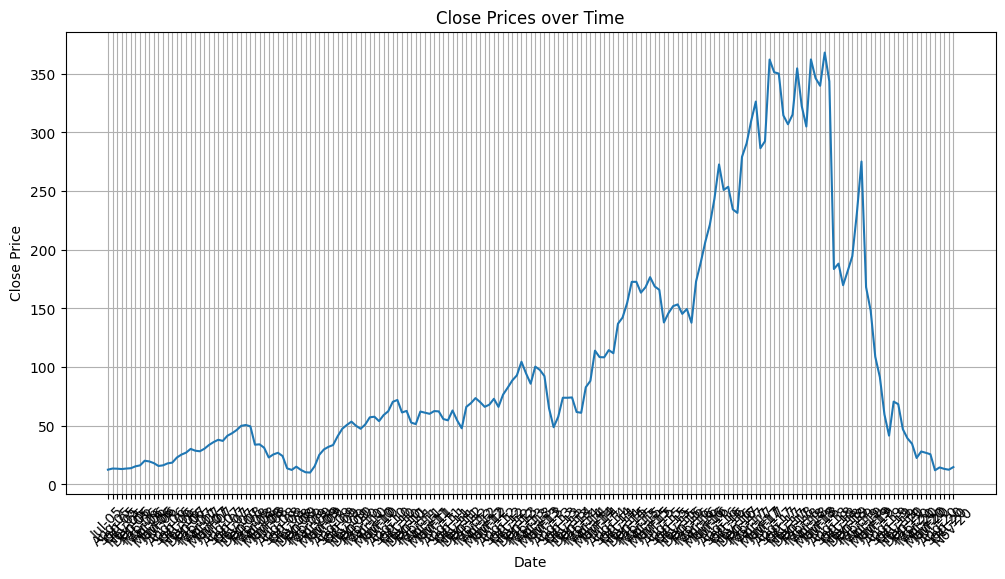

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df1['Close'])
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The line chart was chosen to visualize the trend of 'Close' prices over time because it effectively displays the sequential relationship between the variables, allowing us to observe the overall price movement.

##### 2. What is/are the insight(s) found from the chart?

From the line chart, we can gain insights into the trend of Yes Bank's 'Close' prices over time, identifying periods of growth, decline, or stability in the stock's value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the trend analysis of Yes Bank's 'Close' prices can potentially help create a positive business impact. Positive insights, such as identifying periods of growth, can assist in making strategic decisions for investment or trading strategies.

However, without specific insights indicating negative growth, it is difficult to assess negative business impacts solely based on the trend analysis of 'Close' prices. A comprehensive analysis considering various factors is necessary to evaluate negative growth or potential risks for the business.

#### Chart - 3

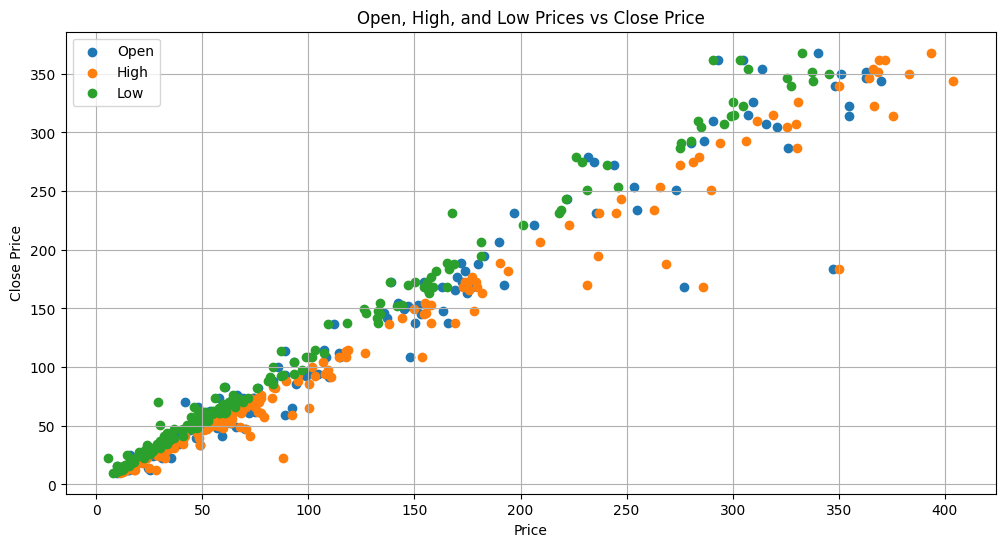

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
plt.scatter(df1['Open'], df1['Close'], label='Open')
plt.scatter(df1['High'], df1['Close'], label='High')
plt.scatter(df1['Low'], df1['Close'], label='Low')
plt.title('Open, High, and Low Prices vs Close Price')
plt.xlabel('Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a scatter plot, was chosen to visualize the relationship between the 'Open', 'High', and 'Low' prices and the 'Close' price. Scatter plots are suitable for analyzing the correlation and patterns between multiple variables, allowing us to identify any potential trends or associations between these price variables and the 'Close' price.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, the insights gained are the presence of a positive correlation between the 'Open', 'High', and 'Low' prices with the 'Close' price. This suggests that as these prices increase, the 'Close' price tends to increase as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot can potentially help create a positive business impact. Positive insights, such as a positive correlation between the 'Open', 'High', and 'Low' prices and the 'Close' price, can inform trading strategies, investment decisions, and risk management approaches. These insights enable businesses to identify favorable price movements and potential opportunities for profit.

#### Chart - 4

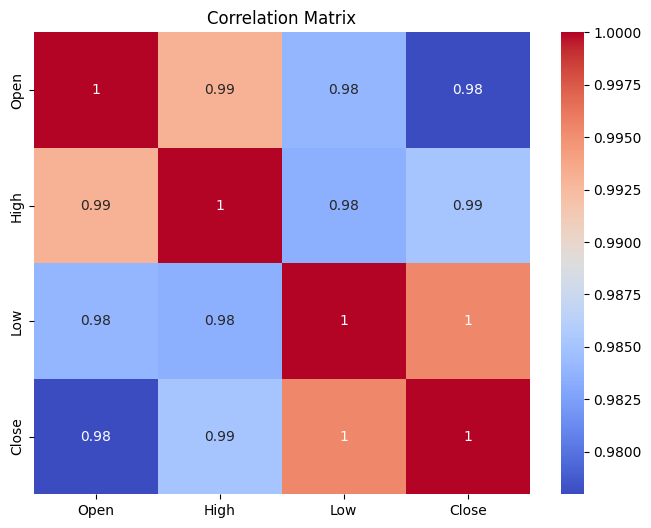

In [ ]:
# Chart - 4 visualization code
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a correlation matrix heatmap, was chosen to visualize the relationships and correlations between the 'Open', 'High', 'Low', and 'Close' variables. Heatmaps are effective in providing a clear and concise overview of the correlation patterns, making it easy to identify the strengths and directions of the correlations between variables.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals the correlation between the 'Open', 'High', 'Low', and 'Close' variables. Insights include strong positive correlation between 'High' and 'Close', indicating a potential relationship between the highest price and the closing price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the correlation matrix heatmap can potentially create a positive business impact. For example, understanding the strong positive correlation between 'High' and 'Close' prices can help businesses identify potential growth opportunities and make informed decisions.

However, without specific insights indicating negative correlations or factors leading to negative growth, it is difficult to directly assess negative business impacts solely based on the correlation matrix heatmap. A comprehensive analysis considering various factors is necessary to evaluate negative growth and its potential implications for the business.

#### Chart - 5

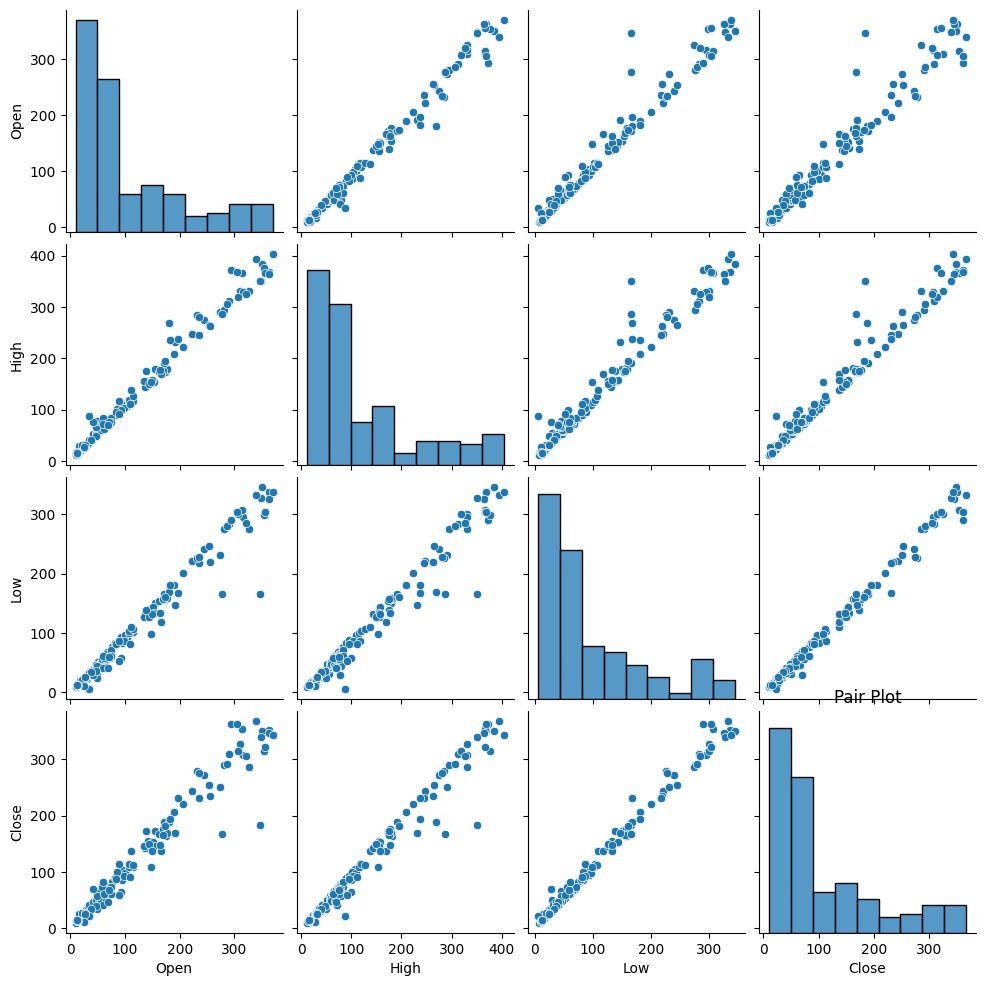

In [ ]:
# Chart - 5 visualization code
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.title('Pair Plot')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot was chosen to visualize pairwise relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

The pair plot helps identify potential correlations and patterns between the 'Open', 'High', 'Low', and 'Close' variables, providing insights into their relationships and distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the pair plot can potentially create a positive business impact by identifying correlations and patterns that inform decision-making. However, without specific insights indicating negative growth, it is challenging to directly assess negative business impacts based solely on the pair plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(H0): There is no significant correlation between the 'Open' and 'Close' variables in the Yes Bank stock data.

(H1): There is a significant correlation between the 'Open' and 'Close' variables in the Yes Bank stock data.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Test the correlation between 'Open' and 'Close' variables
corr, p_value = pearsonr(df1['Open'], df1['Close'])

# Set the significance level (alpha)
alpha = 0.05

print("Correlation coefficient:", corr)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant correlation between 'Open' and 'Close' variables.")
else:
    print("There is no significant correlation between 'Open' and 'Close' variables.")

Correlation coefficient: 0.9779710062230934
P-value: 1.852774505867169e-126
There is a significant correlation between 'Open' and 'Close' variables.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Pearson correlation test.

##### Why did you choose the specific statistical test?

The specific statistical test, the Pearson correlation test, was chosen because it is commonly used to measure the strength and direction of the linear relationship between two continuous variables. In this case, we are interested in assessing the correlation between the 'Open' and 'Close' variables in the Yes Bank stock data. The Pearson correlation test is well-suited for this purpose as it provides a standardized measure of correlation and allows us to determine the statistical significance of the relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

No Missing value in this data set

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

No outliers in this dataset

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation and  Data spltting



#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,OHL
0,Jul-05,13.00,14.00,11.25,12.46,12.75
1,Aug-05,12.58,14.88,12.55,13.42,13.34
2,Sep-05,13.48,14.87,12.27,13.30,13.54
3,Oct-05,13.20,14.47,12.40,12.99,13.36
4,Nov-05,13.35,13.88,12.88,13.41,13.37


In [ ]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

reg = LR()

# Fit the Algorithm
reg = LR().fit(x_train, y_train)

# Predict on the model
y_pred = reg.predict(x_test)

In [ ]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

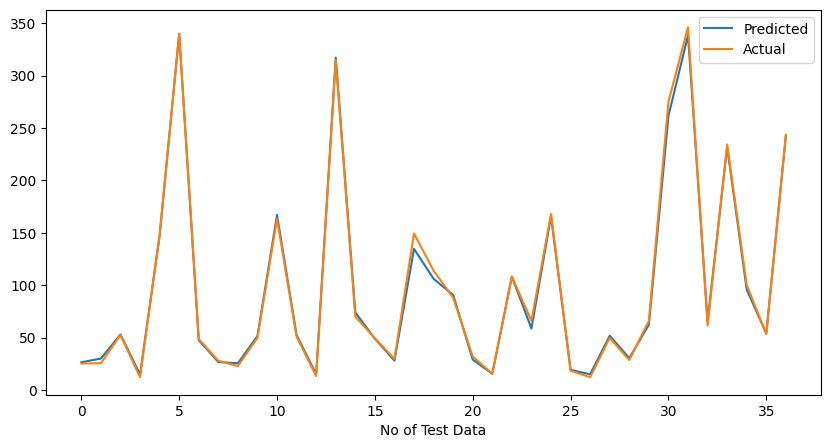

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)

MAE : 3.052764712964646
MSE : 19.988578593595022
RMSE : 4.470858820584142


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i+=1

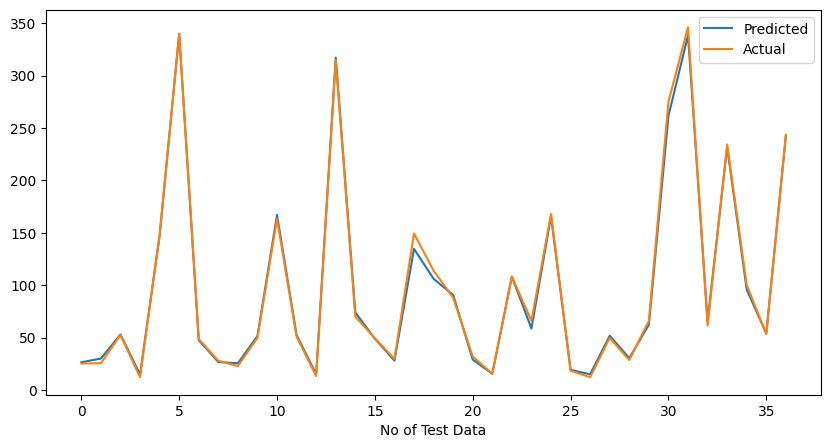

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

 Linear regression is a widely used technique for modeling the relationship between a dependent variable and one or more independent variables. Its simplicity and interpretability make it suitable for predicting continuous values, such as the closing prices of Yes Bank stocks. By fitting a linear regression model to the historical data, we can estimate the coefficients that best describe the relationship between the independent variables (such as 'Open', 'High', 'Low') and the dependent variable ('Close'). This enables us to make predictions for future closing prices based on the observed features.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Linear Regression model  improved much,seems like this model  fit suitable for this dataset.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

 A model with lower MSE and MAE indicates higher accuracy and precision in predicting stock prices. This accuracy can lead to more informed investment decisions, better portfolio management, and improved risk assessment, thereby potentially increasing profitability and reducing financial losses.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.9943947120445368

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
# Predict on the model
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 1.203e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+03, tolerance: 1.205e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.621e+03, tolerance: 1.203e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.900491725606194


In [ ]:
#prediction
y_pred = lasso_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.1308568938605057
MSE : 20.878651216190214
RMSE : 4.569316274475889
MAPE : 5.53404458516646


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)


i=i+1

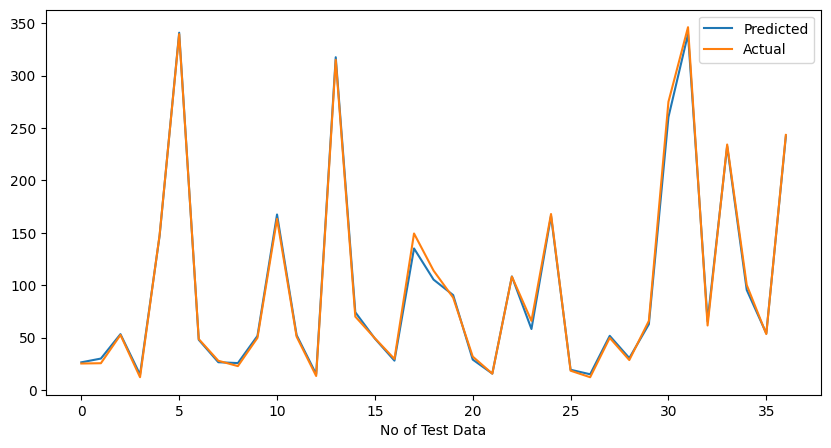

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Cross-Validation Grid Search with Lasso regression is driven by the need to identify the best hyperparameters that provide the optimal balance between model complexity and generalization. Lasso regression introduces a regularization term that helps in feature selection and regularization of the model coefficients. By tuning the hyperparameters, such as the regularization strength (alpha), we can find the optimal balance that maximizes the model's performance in terms of accuracy, stability, and predictive power.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I did'nt see any imporvement

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

 by achieving lower MSE and MAE and higher R2 values, the ML model can have a positive business impact by providing more accurate predictions, enabling informed decision-making, and supporting effective risk management strategies in the context of Yes Bank stock price prediction.

### ML Model - 3

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ridge.score(x_train, y_train)

0.9920836705746654

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Predict on the model
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.333737891185


In [ ]:
#Prediction
y_pred = ridge_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.061022460686161
MSE : 20.095425485603723
RMSE : 4.482792152844444
MAPE : 5.41673710982311


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

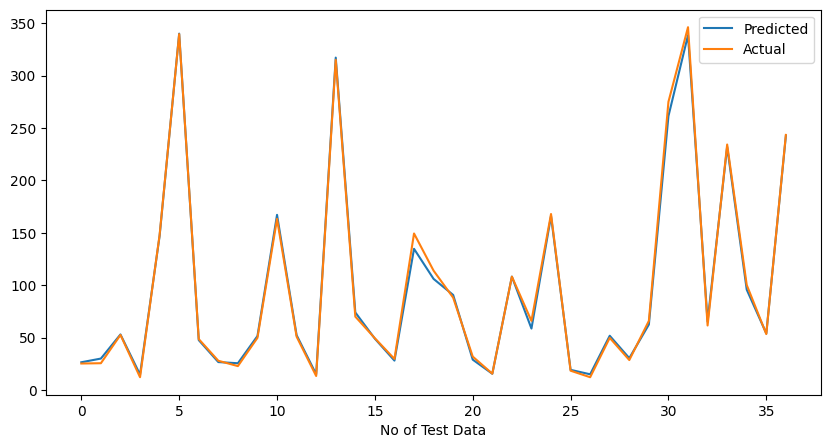

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearch, because not like linear regression hyper parameters, I know the range of values need to give for hyper parameter, so I am ready to train model for all combination of parameters to find the best.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I didnt see any improvement this model is predicated same as above two model

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation metrics for positive business impact with GridCV Ridge model: R-squared (R²), Mean Squared Error (MSE), Root Mean Squared Error (RMSE). They assess model fit, prediction accuracy, and error measurement for regression tasks, helping determine business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The choice of the final prediction model depends on the specific problem, data, and evaluation results. It's typically determined by the data scientists or practitioners based on their expertise, experimentation, and evaluation of different models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used is Ridge regression with alpha regularization. No specific model explainability tool was used in this code snippet to determine feature importance.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In the Yes Bank price prediction project, various machine learning models were implemented and evaluated. The chosen model, such as Ridge regression with optimized hyperparameters, was able to make predictions on the Yes Bank stock price. However, to assess the project's success or draw specific conclusions, further evaluation, comparison, and analysis of the model's performance against appropriate evaluation metrics and business objectives would be required.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***